In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)
# data.drop(['ocean_proximity'],axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [6]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
train_data = x_train.join(y_train)

In [8]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12757,-121.39,38.63,34.0,1226.0,180.0,359.0,167.0,3.8068,INLAND,150400.0
20028,-119.01,36.08,31.0,1620.0,366.0,1154.0,348.0,1.8857,INLAND,55500.0
15726,-122.45,37.78,43.0,1452.0,397.0,897.0,393.0,4.1319,NEAR BAY,322700.0
17608,-121.90,37.29,36.0,1389.0,225.0,623.0,223.0,6.6331,<1H OCEAN,283300.0
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,<1H OCEAN,422700.0
...,...,...,...,...,...,...,...,...,...,...
3027,-119.45,35.13,34.0,1440.0,309.0,808.0,294.0,2.3013,INLAND,26600.0
18376,-121.89,37.21,14.0,5636.0,697.0,2281.0,680.0,8.4262,<1H OCEAN,459200.0
16366,-121.30,38.01,30.0,2547.0,485.0,1547.0,501.0,3.9940,INLAND,95500.0
8000,-118.13,33.85,36.0,2110.0,416.0,1128.0,403.0,4.6019,<1H OCEAN,208400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

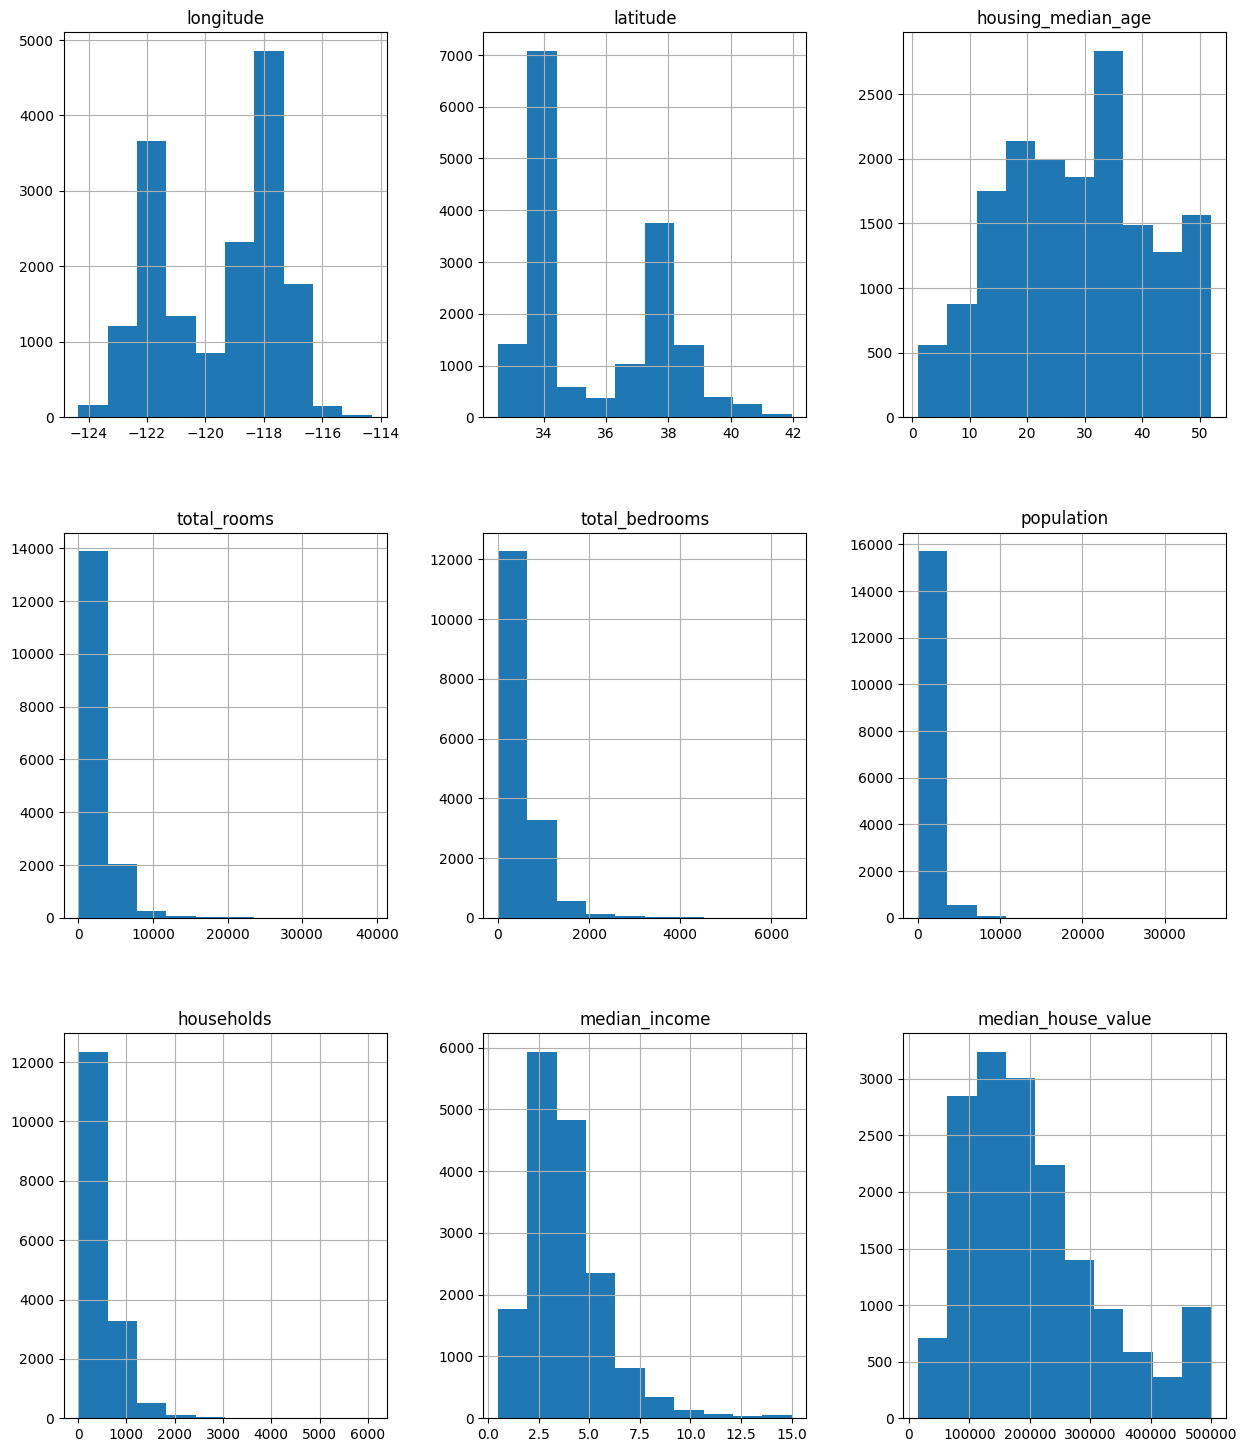

In [9]:
train_data.hist(figsize=(15,18))


In [10]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

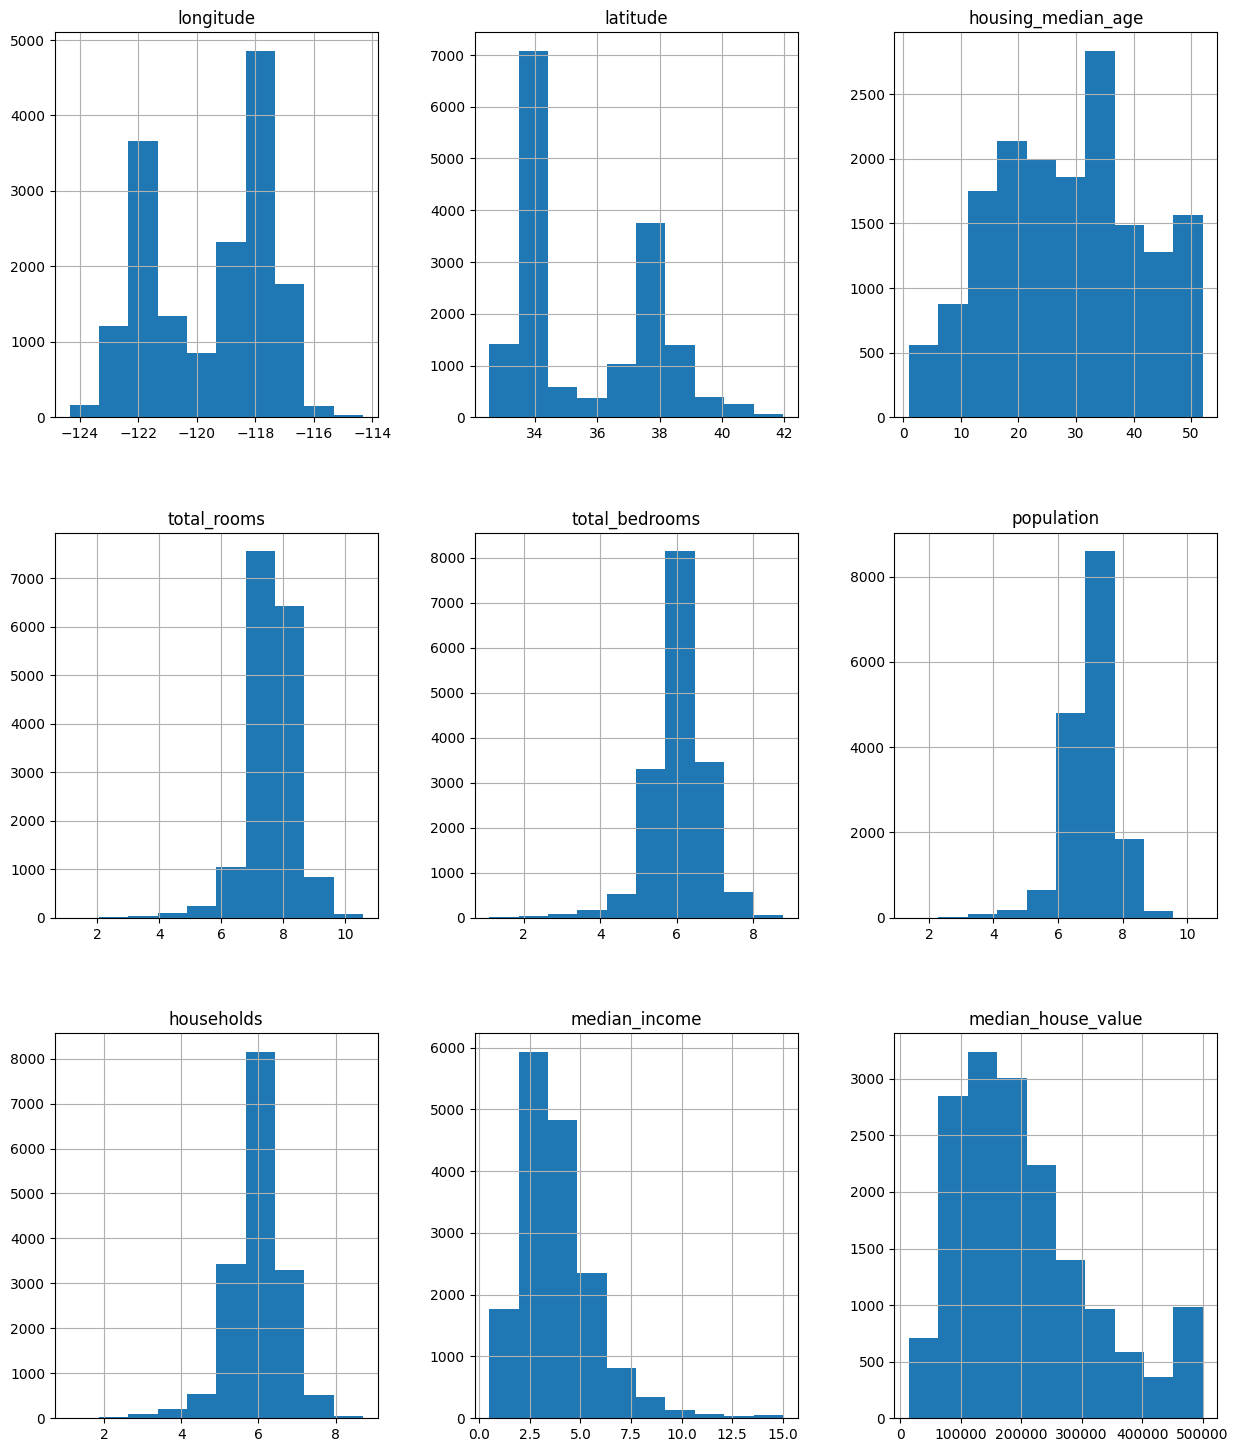

In [11]:
train_data.hist(figsize=(15,18))

In [12]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [13]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12757,-121.39,38.63,34.0,7.112327,5.198497,5.886104,5.123964,3.8068,150400.0,False,True,False,False,False
20028,-119.01,36.08,31.0,7.390799,5.905362,7.051856,5.855072,1.8857,55500.0,False,True,False,False,False
15726,-122.45,37.78,43.0,7.281386,5.986452,6.800170,5.976351,4.1319,322700.0,False,False,False,True,False
17608,-121.90,37.29,36.0,7.237059,5.420535,6.436150,5.411646,6.6331,283300.0,True,False,False,False,False
8589,-118.39,33.89,38.0,7.524021,5.808142,6.621406,5.752573,7.3356,422700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,-119.45,35.13,34.0,7.273093,5.736572,6.695799,5.686975,2.3013,26600.0,False,True,False,False,False
18376,-121.89,37.21,14.0,8.637107,6.548219,7.732808,6.523562,8.4262,459200.0,True,False,False,False,False
16366,-121.30,38.01,30.0,7.843064,6.186209,7.344719,6.218600,3.9940,95500.0,False,True,False,False,False
8000,-118.13,33.85,36.0,7.654917,6.033086,7.029088,6.001415,4.6019,208400.0,True,False,False,False,False


<Axes: >

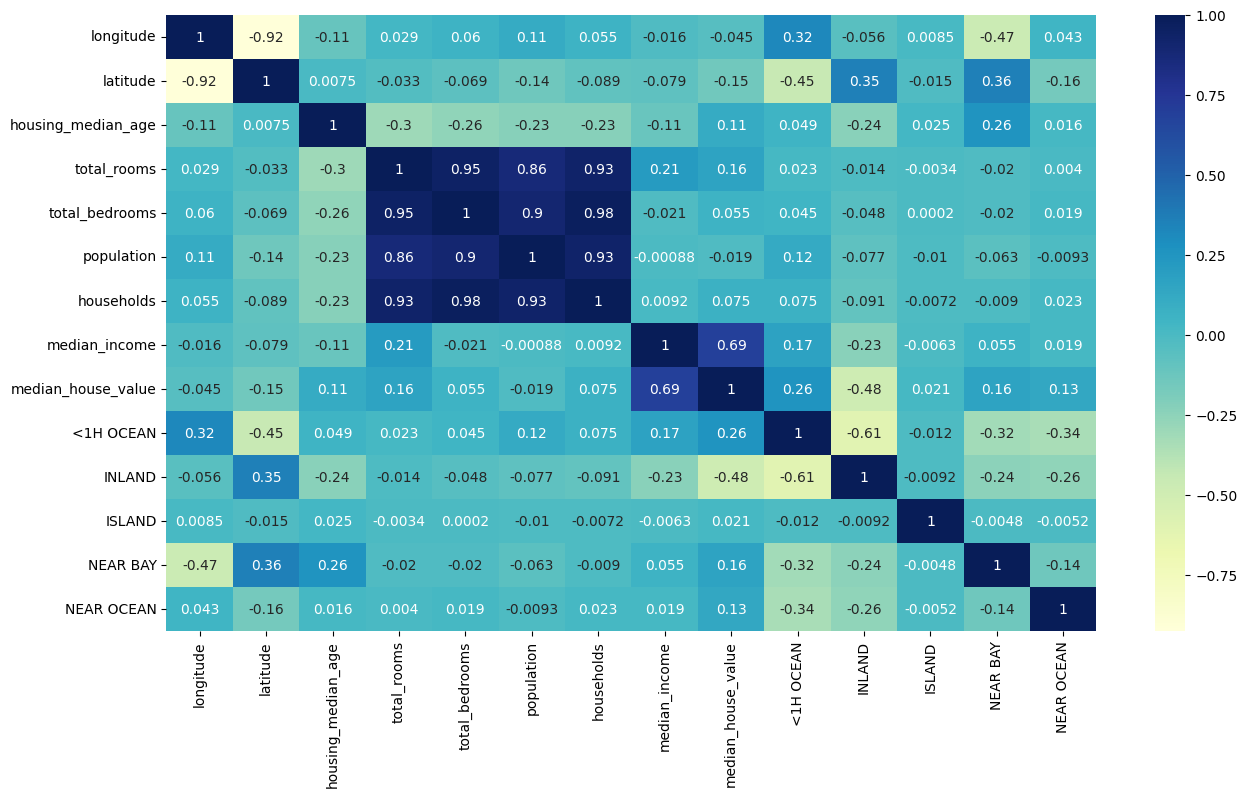

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

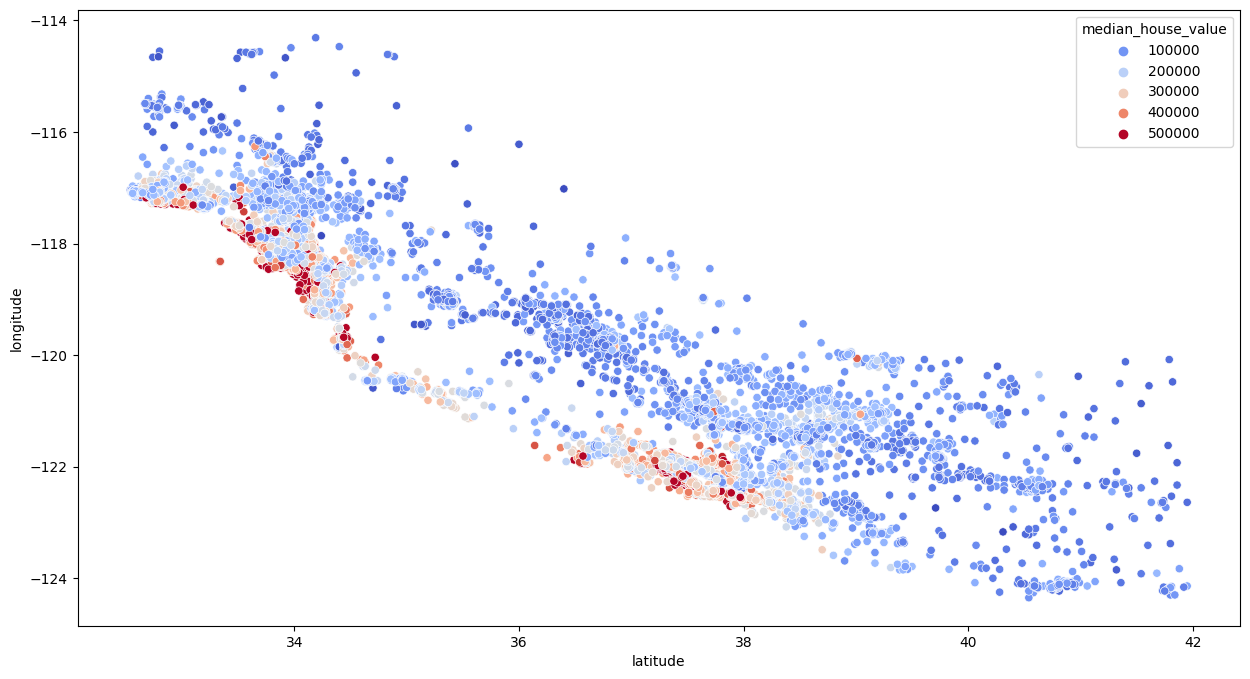

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [16]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

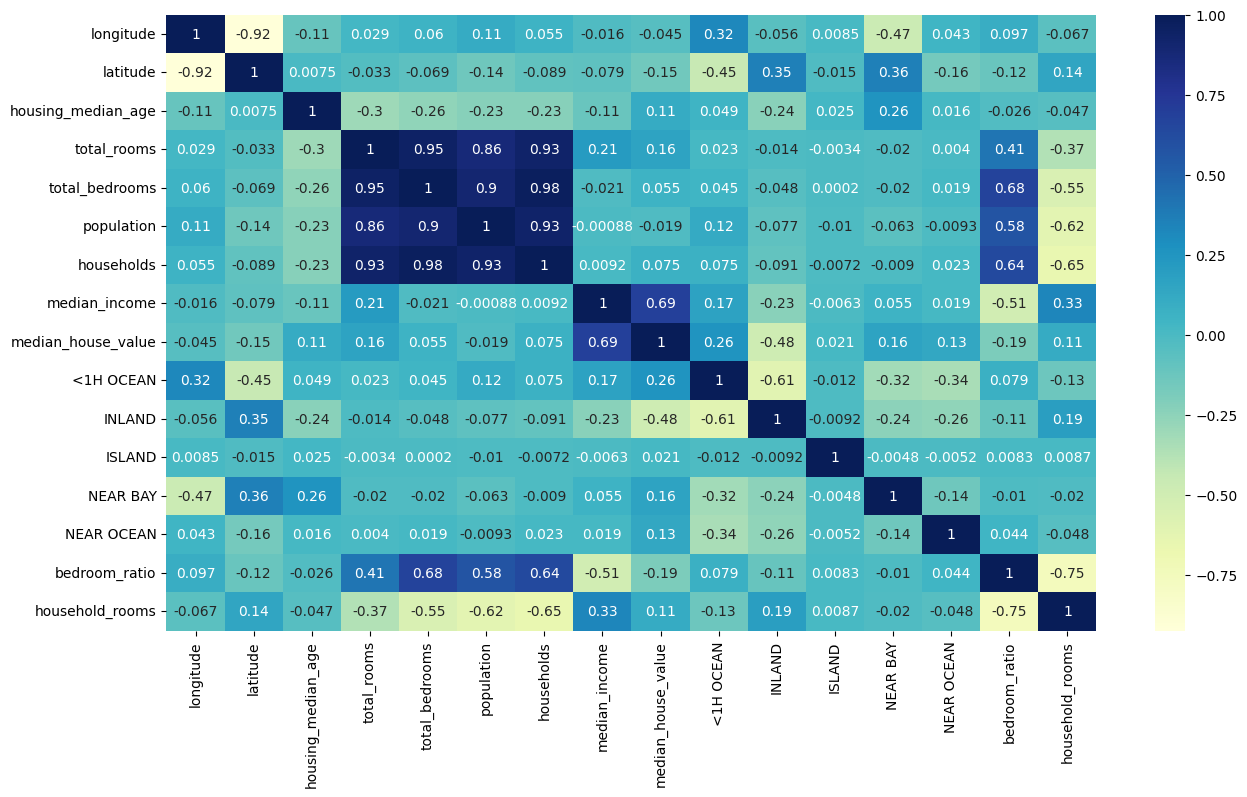

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")


In [19]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
test_data = x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

x_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [23]:
test_data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8148,-118.08,33.81,20.0,8.747670,6.843750,7.737616,6.774224,7.6084,402500.0,True,False,False,False,False,0.782351,1.291317
14363,-117.23,32.73,35.0,7.977625,6.527958,7.354362,6.459904,2.5259,240200.0,False,False,False,False,True,0.818283,1.234945
3586,-118.53,34.23,32.0,8.304000,6.892642,7.892078,6.848005,3.0321,240000.0,True,False,False,False,False,0.830039,1.212616
17539,-121.89,37.35,44.0,7.610853,6.423247,7.126087,6.251904,2.0549,193800.0,True,False,False,False,False,0.843959,1.217366
18958,-122.04,38.26,34.0,8.033658,6.555357,7.493317,6.556778,2.7885,105900.0,False,True,False,False,False,0.815987,1.225245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,-122.07,37.40,15.0,7.986505,6.814543,6.850126,6.568078,4.3590,192200.0,False,False,False,True,False,0.853257,1.215958
13217,-117.72,34.00,15.0,8.381144,6.538140,7.787797,6.502790,5.4824,179700.0,False,True,False,False,False,0.780101,1.288854
15532,-117.14,33.18,11.0,8.621013,6.882437,7.741099,6.878326,3.7109,199800.0,True,False,False,False,False,0.798333,1.253359
16336,-121.35,38.04,12.0,8.735204,6.927558,8.235361,6.869014,3.7206,146000.0,False,True,False,False,False,0.793062,1.271682


In [24]:
reg.score(x_test,y_test)

0.6651338234170396

Random Forest Model!

In [25]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)


RandomForestRegressor()

In [26]:
forest.score(x_test,y_test)


0.8103674130344016